## Some references for tonight:

- summary stats -> https://www.kdnuggets.com/2020/06/8-basic-statistics-concepts.html
- data merges/joins/concatenation -> https://realpython.com/pandas-merge-join-and-concat/, https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- data -> https://www.kaggle.com/code/kerneler/starter-coffee-shop-sample-data-912779fb-7/data?select=staff.csv
- cheat sheet for data manipulation -> https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## What we will learn: 
1. How to merge data sets; left, right, inner, outer merge, joins, & concatentation
2. How to aggregate data using groupbys

In [28]:
import pandas as pd

### Merge: squish 'em together

In [37]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K10"],
        "C": ["C0", "C1", "C2", "B2"],
        "D": ["D0", "D1", "D2", "Z1"],
    }
)




In [35]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [38]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K10,B2,Z1


In [45]:
result = pd.merge(left, right, how= "outer", on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,NaN,NaN
4,K10,NaN,NaN,B2,Z1


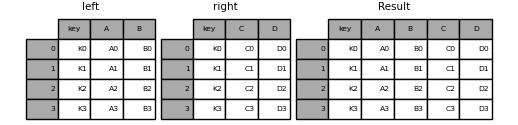

In [46]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)


result = pd.merge(left, right, on=["key1", "key2"])

In [48]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [49]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [47]:
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


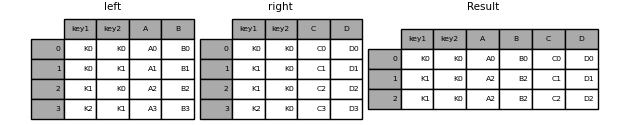

In [50]:
# Left Join (merge)
result = pd.merge(left, right, how="left", on=["key1", "key2"])


In [51]:
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


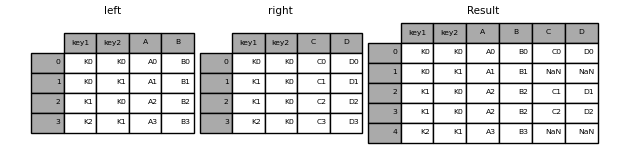

In [ ]:
# Right Join
result = pd.merge(left, right, how="right", on=["key1", "key2"])


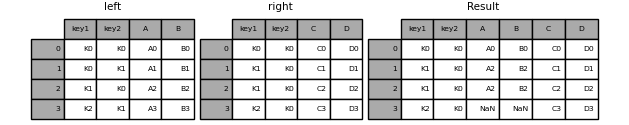

In [7]:
# Outer Join
result = pd.merge(left, right, how="outer", on=["key1", "key2"])


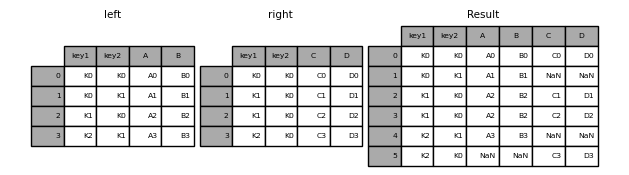

In [52]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [53]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [54]:
# Inner Join
result = pd.merge(left, right, how="inner", right_on="key1", left_on = "key2")


In [55]:
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K1,K0,A2,B2,K0,K0,C0,D0
2,K0,K1,A1,B1,K1,K0,C1,D1
3,K0,K1,A1,B1,K1,K0,C2,D2
4,K2,K1,A3,B3,K1,K0,C1,D1
5,K2,K1,A3,B3,K1,K0,C2,D2


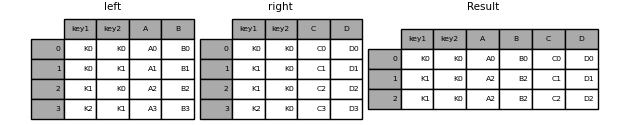

### Concatenation: stack 'em

In [61]:

df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
   
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    }
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "D": ["D8", "D9", "D10", "D11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
      
    }
)


frames = [df1, df2, df3]

result = pd.concat(frames)

In [62]:
result.reset_index()

,index,A,B,C,D
0,0,A0,B0,C0,D0
1,1,A1,B1,C1,D1
2,2,A2,B2,C2,D2
3,3,A3,B3,C3,D3
4,0,A4,B4,C4,D4
5,1,A5,B5,C5,D5
6,2,A6,B6,C6,D6
7,3,A7,B7,C7,D7
8,0,A8,B8,C8,D8
9,1,A9,B9,C9,D9


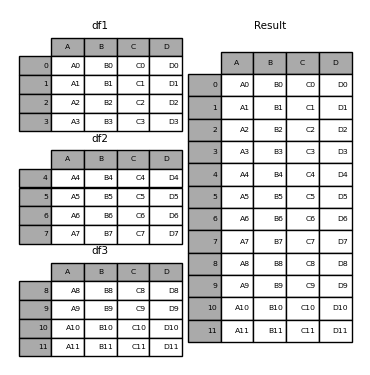

In [ ]:
# add keys as a secondary index to identify original chunks of concatenated dataframes
result = pd.concat(frames, keys=["x", "y", "z"])

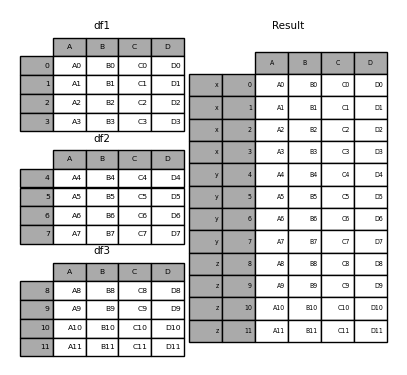

In [ ]:
#select a chunk!
result.loc["y"]

## Groupbys: How we can aggregate data

In [74]:
l = [[1, 2, 3], [1, 6, 4], [2, 1, 3], [1, 2, 2]]
df = pd.DataFrame(l, columns=["a", "b", "c"])

In [64]:
df

,a,b,c
0,1,2,3
1,1,6,4
2,2,1,3
3,1,2,2


In [65]:
df.groupby(by=["b"]).sum()


,a,c
b,,
1,2,3
2,2,5
6,1,4


In [19]:
df.groupby(by=["b"]).mean()

,a,c
b,,
1,2.0,3.0
2,1.0,2.5
6,1.0,4.0


In [75]:
df.groupby(by=["b"]).mean()

pandas.core.frame.DataFrame

In [21]:
# Let's pull just groups of employees

In [77]:
data1 = {'Name':['Jai', 'Anuj', 'Jai', 'Princi',
                 'Gaurav', 'Anuj', 'Princi', 'Abhi'],
        'Age':[27, 24, 22, 32,
               33, 36, 27, 32],
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj',
                   'Jaunpur', 'Kanpur', 'Allahabad', 'Aligarh'],
        'Qualification':['Msc', 'MA', 'MCA', 'Phd',
                         'B.Tech', 'B.com', 'Msc', 'MA']}
    
  
# Convert the dictionary into DataFrame 
df = pd.DataFrame(data1)

In [67]:
df

,Name,Age,Address,Qualification
0,Jai,27,Nagpur,Msc
1,Anuj,24,Kanpur,MA
2,Jai,22,Allahabad,MCA
3,Princi,32,Kannuaj,Phd
4,Gaurav,33,Jaunpur,B.Tech
5,Anuj,36,Kanpur,B.com
6,Princi,27,Allahabad,Msc
7,Abhi,32,Aligarh,MA


In [78]:
grp = df.groupby('Name')

In [79]:
grp

In [71]:
type(grp)

pandas.core.series.Series

In [26]:
# Can we work with this as a dataframe? How can we convert this?

In [80]:
pd.DataFrame(grp)
#set columns names

,0,1
0,Abhi,Name Age Address Qualification 7 Abhi ...
1,Anuj,Name Age Address Qualification 1 Anuj 2...
2,Gaurav,Name Age Address Qualification 4 Gaura...
3,Jai,Name Age Address Qualification 0 Jai ...
4,Princi,Name Age Address Qualification 3 Pri...


Step 1: Read in the Data as a pandas dataframe from "201904 sales reciepts.csv.zip" as "sales",  "customer.csv" as "customers", and "product.csv" as "product"

In [81]:
sales = pd.read_csv("Data/201904salesreciepts.csv")
customer = pd.read_csv("Data/customer.csv")
product = pd.read_csv("Data/product.csv")

In [87]:
sales.shape

(49894, 14)

In [88]:
customer.shape

(2246, 9)

Step 2: Merge sales & customers on the unique identifier, only include the sales that belong to a customer in the customer file.
What type of join is this?

In [85]:
result = pd.merge(sales, customer, how = "inner", on= "customer_id")

In [90]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [96]:
result.shape

(24852, 22)

In [93]:
product.columns

Index(['product_id', 'product_group', 'product_category', 'product_type', 'product', 'product_description', 'unit_of_measure', 'current_wholesale_price', 'current_retail_price', 'tax_exempt_yn', 'promo_yn', 'new_product_yn'], dtype='object')

In [94]:
salesmonies = pd.merge(result, product, how = "inner", on = "product_id")

In [97]:
salesmonies.head(3)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.5,2.5,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N
1,229,2019-04-17,10:43:54,3,16,38,Y,1,1,52,2,5.0,2.5,N,3,Xanthus Puckett,Kylynn@aliquam.gov,2017-04-16,436-942-8673,1956-09-13,M,1956,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N
2,390,2019-04-13,18:01:49,3,12,128,Y,1,1,52,2,5.0,2.5,N,3,Bernard Callahan,Anthony@placerat.org,2017-12-20,061-805-1586,1972-01-05,M,1972,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N


In [108]:
salesmonies["current_retail_price_int"] = salesmonies["current_retail_price"].apply(lambda x: x.replace("$",""))

In [111]:
salesmonies["current_retail_price_float"] = salesmonies["current_retail_price_int"].astype(float)

Step 3: If I want to know the average $$ spent in this coffee shop per customer, how can I find that information?

In [116]:
grpd_customers = salesmonies.groupby("customer_id")["current_retail_price_float"].mean()

In [119]:
grpd_df = pd.DataFrame(grpd_customers)

In [123]:
grpd_df.sort_values("current_retail_price_float", ascending = False)[0:9]

,current_retail_price_float
customer_id,
5027,11.500000
45,10.150000
5495,8.887500
394,7.805556
5125,7.775000
5455,7.733333
5652,7.360000
526,7.258333
8048,7.232500


Step 4: Find the top 10 customers of the store based on the average $$ spent at the shop within the data set

Step 5: Find the top 10 morning customers of the store (from 8am-noon)

In [125]:
salesmonies.head(1)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_int,current_retail_price_float
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.5,2.5,N,3,Melissa Johnson,Luke@eget.net,2018-06-19,816-924-9433,1983-02-25,F,1983,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,Sit back and think of the tropical breezes.,16 oz,0.63,$2.50,Y,N,N,2.50,2.5
